In [102]:
### MATPLOTLIB SETUP ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
pd.set_option('display.float_format', lambda x: '%e' % x)

## Amit's library with some utility functions for reading and processing scope data; reproduced below
sys.path.append("../../")
from lib import *

from rich.console import Console
from rich.syntax import Syntax
Console().print(Syntax.from_path("../../lib.py", line_numbers=True, theme="monokai"))

## Jupyter magic
%matplotlib
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

   1 import csv                                                                                                    
   2 import pandas as pd                                                                                           
   3 import numpy as np                                                                                            
   4                                                                                                               
   5 R = 5 # Load Resistance                                                                                       
   6 VG = 18 # Input Voltage                                                                                       
   7 Fs = 50500 # Measured frequency                                                                               
   8 Ts = 1/ Fs                                                                                                    
   9 R_SHUNT = 0.05 # from schematic                                                                               
  10                                                                                                               
  11 # read funky Rigol CSV format                                                                                 
  12 def read_rigol_csv(csv_file_name):                                                                            
  13     with open(csv_file_name) as f:                                                                            
  14         rows = list(csv.reader(f))                                                                            
  15         i = 0                                                                                                 
  16         while rows[0][i] != "":                                                                               
  17             i = i+1                                                                                           
  18         numcols = i-2                                                                                         
  19         t0 = float(rows[1][numcols])                                                                          
  20         dT = float(rows[1][numcols+1])                                                                        
  21                                                                                                               
  22     data = pd.read_csv(csv_file_name, usecols=range(0,numcols), skiprows=[1])                                 
  23     data['X'] = t0+data['X']*dT                                                                               
  24     return data, t0, dT                                                                                       
  25                                                                                                               
  26 def import_and_clean(name, cols, filt):                                                                       
  27     """                                                                                                       
  28     Import and clean some data from the Rigol scope                                                           
  29                                                                                                               
  30     @param name: name of csv file (assumed to live in `./data`)                                               
  31     @param cols: what to rename columns to                                                                    
  32     @param filt: whether to apply 10 sample rolling mean LPF                                                  
  33                                                                                                               
  34     @return pd.df - renamed/filtered dataframe                                                                
  35     """                    

Using matplotlib backend: inline
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Inductance at shunt voltage of 100mV: 18.76 uH
Inductance at shunt voltage of 200mV: 19.103 uH
Mean Inductance: 18.931 uH


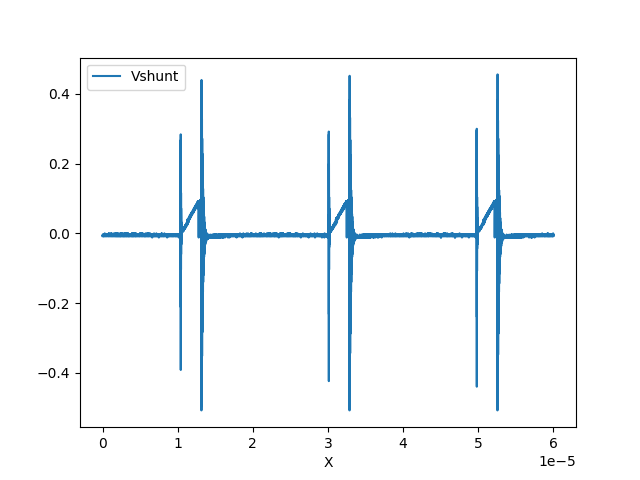

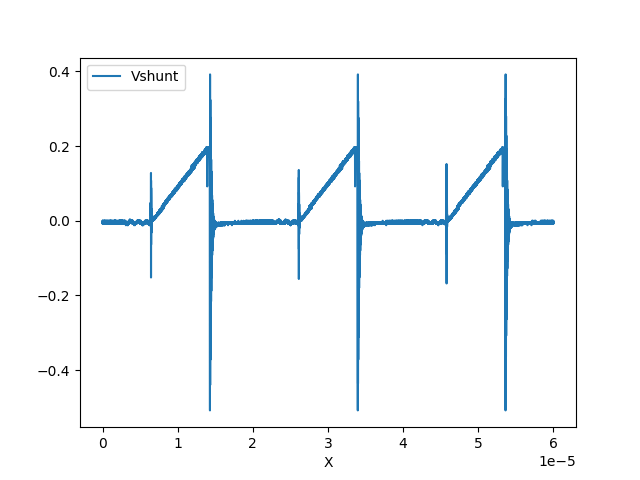

In [108]:
V = [3.55, 8.13]
start = [3.05e-5, 2.8e-5]
end = [3.25e-5, 3.2e-5]
Ls = []

for (task, start, end, V) in zip(['100mV', '200mV'], start, end, V):
    data, _ = import_and_clean(task, ["Vshunt", "Vdrain"], False)
    data.plot(x="X", y="Vshunt")
    Ls.append(L := calc_inductance(data, start, end, V))
    print(f"Inductance at shunt voltage of {task}: {round(L * 10e5, 3)} uH")


print(f"Mean Inductance: {round(np.mean(Ls) * 10e5, 3)} uH")
